In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
from ballroom_analysis.scoring import *
from ballroom_analysis.scraping import * 

Amateur Collegiate Gold Standard
Amateur Collegiate Silver Rhythm
Amateur Collegiate Gold Rhythm
Amateur Adult Silver Rhythm
Amateur Collegiate Silver Standard
Amateur Collegiate Silver Intl. Tango
Amateur Collegiate All Syllabus Standard
Amateur Adult Silver Intl. V. Waltz
Amateur Adult Silver Standard
Amateur Adult Silver Intl. Tango
Amateur Collegiate Silver Smooth
Amateur Adult Gold Smooth
Amateur Collegiate Gold Smooth
Amateur Adult Novice Smooth
Amateur Adult Silver Latin
Amateur Collegiate Silver Latin
Amateur Collegiate Bronze Latin
Amateur Adult Bronze 1 Latin
Amateur Adult Bronze Latin
detected single-event
calculating event-wise score


In [3]:

name = "Larson Wells"
soup = get_event_list_html(name)
events = extract_events_from_html(soup)


In [4]:

results = [get_event_result(name, event_url) for _, event_url in events]

In [5]:

for (event_name, event_url), result in zip(events, results):
    if result.placement:
        print(f"In {event_name}, {name.split()[0]} got {result.callbacks} callbacks and placed {result.placement} ({result.num_dances} dances)")
        print(f"\tscored {score_result(result)}")
    else:
        print(f"In {event_name}, {name.split()[0]} got {result.callbacks} callbacks ({result.num_dances} dances)")
        print(f"\tscored {score_result(result)}")

In Amateur Collegiate Gold Rhythm, Larson got 0 callbacks and placed 7.0 (4 dances)
	scored 12.0
In Amateur Collegiate Silver Intl. Tango, Larson got 0 callbacks (1 dances)
	scored 3
In Amateur Collegiate Silver Standard, Larson got 0 callbacks (3 dances)
	scored 9
In Amateur Collegiate Silver Amer. Bolero, Larson got 1 callbacks (1 dances)
	scored 6
In Amateur Collegiate Silver Rhythm, Larson got 1 callbacks (3 dances)
	scored 18
In Amateur Collegiate Bronze 1 Latin, Larson got 3 callbacks and placed 1.0 (2 dances)
	scored 84.0
In Amateur Collegiate Silver Latin, Larson got 2 callbacks and placed 2.0 (3 dances)
	scored 102.0
In Amateur Adult All Syllabus Intl. Paso Doble, Larson got 1 callbacks and placed 1.0 (1 dances)
	scored 36.0


In [6]:
sum(score_result(result) for result in results)

270.0

In [7]:
file_path = "../data/roster.txt"

with open(file_path, "r") as file:
    names = file.readlines()

names = [name.strip() for name in names]

In [8]:
events_by_name, results_by_name, score_by_name = {}, {}, {}

for name in tqdm(names):
    events_by_name[name] = extract_events_from_html(get_event_list_html(name))
    results_by_name[name] = [get_event_result(name, event_url) for _, event_url in events_by_name[name]]
    score_by_name[name] = sum(score_result(result) for result in results_by_name[name])

 38%|███▊      | 14/37 [00:00<00:01, 16.50it/s]

100%|██████████| 37/37 [00:01<00:00, 29.66it/s]


In [9]:
sorted_scores = sorted(score_by_name.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_scores:
    print(f"{int(score)} - {name}")

919 - Echo Nelson
820 - Carmen Schultz
809 - Khalid Ali
708 - Armarion Julien
602 - Aquarina Hoanca
600 - Irena Wilson
552 - Jack Orr
522 - Tessa Lundheim
427 - Daniel Kindem
355 - Kourtney Muus
325 - Cas Wehring
292 - Brody Schaffner
276 - Keding Chen
270 - Alena Ang
262 - Mei Abraham
201 - Allison Jondahl
183 - Maddie Shaheen
169 - Sasha Hydrie
168 - Connor de Bruin
157 - Joseph Jackson
151 - Emma Nahr
150 - Alexis Villapando
148 - Hailey Bargman
136 - Daniel Han
123 - Olesia Sarazhynskyy
120 - Pheng Xiong
96 - Elizabeth Wahl
90 - Sydney Goethel
69 - Henry Jonas
69 - Maya Lindvall
66 - Helen Hoang
54 - Ryan Lynch
48 - Rachel Luban
45 - Vaibhav Jain
42 - Yadu Kiran
36 - Jeffrey Zhao
30 - Lev Ostrer


In [10]:
sum([score for (_, score) in score_by_name.items()])

10091.0

In [11]:
extra_names = ["Larson Wells"]

for name in extra_names:
    if name in names:
        continue
    events_by_name[name] = extract_events_from_html(get_event_list_html(name))
    results_by_name[name] = [get_event_result(name, event_url) for _, event_url in events_by_name[name]]
    score_by_name[name] = sum(score_result(result) for result in results_by_name[name])
    names.append(name)
    print(f"{name}: {score_by_name[name]}")

Larson Wells: 270.0


In [12]:
delete_names = ['Broderick Schaffner', 'Jeff Zhao']
for name in delete_names:
    if name not in names:
        continue
    del score_by_name[name]
    del results_by_name[name]
    del events_by_name[name]
    names.remove(name)

In [13]:
from tqdm import tqdm

overall_events = set()
for name in tqdm(names):
    for event in events_by_name[name]:
        overall_events.add(event)

100%|██████████| 38/38 [00:00<00:00, 50597.95it/s]


In [14]:
divisions = set()
levels = set()
event_names = set()
for event, _ in overall_events:
    divisions.add(event.division)
    levels.add(event.level)
    event_names.add(event.event)

In [15]:
divisions

{'Amateur Adult', 'Amateur Collegiate'}

In [16]:
levels

{'All',
 'Bronze',
 'Bronze 1',
 'Championship',
 'Gold',
 'Novice',
 'Pre',
 'Pre-Bronze',
 'Pre-Champ',
 'Silver'}

In [17]:
event_names

{'Amer. Bolero',
 'Bronze 1 Latin',
 'Intl. Jive',
 'Intl. Tango',
 'Intl. V. Waltz',
 'Latin',
 'Rhythm',
 'Smooth',
 'Standard',
 'Syllabus Intl. Paso Doble',
 'Syllabus Standard'}

In [18]:
dancer_info = {name: (events_by_name[name], results_by_name[name]) for name in names}

In [19]:
import pickle
with open("../data/dancer_info.pkl", "wb") as file:
    pickle.dump(dancer_info, file)

In [20]:
dump_cache()

# Visualization!

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
sns.set_style("darkgrid")

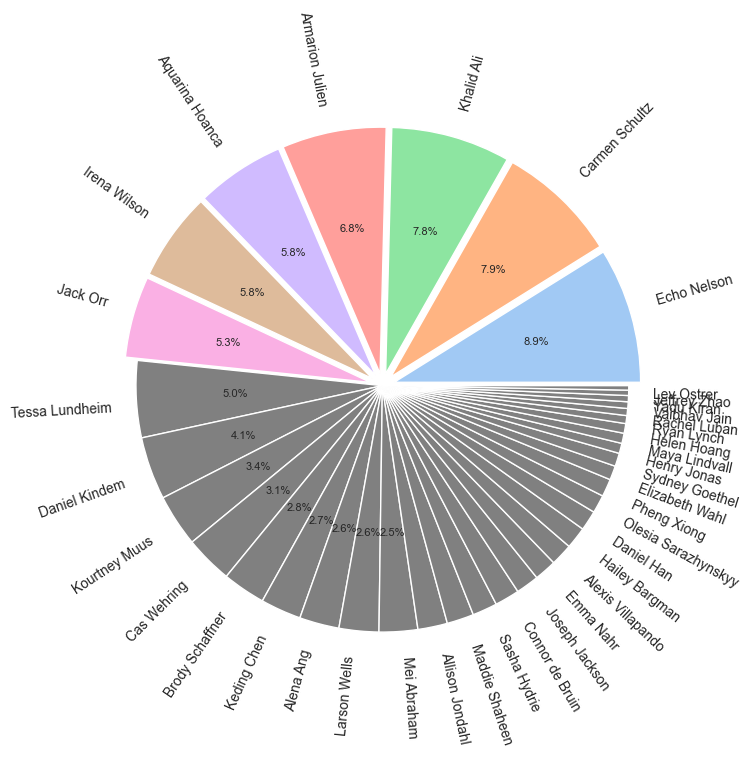

In [22]:
scores = {name: sum(score_result(result) for result in results) for name, (_, results) in dancer_info.items()}
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
labels = [name for name, _ in sorted_scores]
values = [score for _, score in sorted_scores]

explosion = [0] * len(labels)
explosion[:7] = [0.05] * 7 # type: ignore

colors = sns.color_palette("pastel")[:7]
colors.extend(['grey'] * (len(labels) - 7))  # type: ignore

def autopct(pct):
    return ('%1.1f%%' % pct) if pct >= 2 else ''

plt.figure(figsize=(8, 8))

_, _, autotexts = plt.pie(values, explode=explosion, labels=labels, colors=colors, autopct=autopct, rotatelabels=True) # type: ignore

for autotext in autotexts:
    autotext.set_fontsize(8)  

plt.show()


In [23]:
import seaborn as sns
# Define the levels and their corresponding colors
levels = ['bronze', 'silver', 'gold', 'open']
colors = ['#CD7F32', 'silver', 'gold', 'cyan']

# Get the points for each level
points = [points_by_level[level] for level in levels]

# Create the bar chart using seaborn
sns.barplot(x=levels, y=points, palette=colors)

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Points')
plt.title('Points by Level')

# Show the chart
plt.show()
    

NameError: name 'points_by_level' is not defined